**Network Traffic Analysis Project**

The CICIDS2017 dataset consists of labeled network flows, including full packet payloads in pcap format, the corresponding profiles and the labeled flows (GeneratedLabelledFlows.zip) and CSV files for machine and deep learning purpose (MachineLearningCSV.zip) are publicly available for researchers. 

Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Portugal, January 2018

In [ ]:
# load data
import pandas

def load_data(fname):
  '''
  load the data in fname into a pandas dataframe and return it
  '''
  df = pandas.read_csv(fname)
  return df

#
folder_name = './MachineLearningCVE/'
file_name = folder_name + 'Monday-WorkingHours.pcap_ISCX.csv'

df1 = load_data(file_name)
# print(df1.head())
# print(len(list(df1)))

In [ ]:
import os

# Specify the folder path

# Get the list of files in the folder
file_names = os.listdir(folder_name)
print(file_names)
dfs_raw = []
for file in file_names:
    dfs_raw.append(load_data(folder_name+file))
print(len(dfs_raw))

In [13]:
# list of dataframes
import copy

dfs = copy.deepcopy(dfs_raw)

In [ ]:
# clean the data: deal with NaN values, {-inf, inf} infinity values, strings in numerical values
print(dfs[1].head())

In [ ]:
# find out any non-numerical values


In [ ]:
for df in dfs:
  set_dif = set(df.columns).symmetric_difference(set(df._get_numeric_data().columns))
  non_numeric_columns = list(set_dif)
  print('non_numeric_columns: ', non_numeric_columns)

In [ ]:
# Label statistics
for i in range(8):
  mask = dfs[i][' Label'].values == 'BENIGN' # majority of the samples are benign;
  num_malicious = len(dfs[i][' Label'].values) - sum(mask)
  # num of malicious samples = total number of sample - num of benign samples
  print('-'*30, 'file ', i, '-'*30)
  print('num of samples: ', len(dfs[i][' Label'].values))
  print('num of benign samples: ', sum(mask))
  print('num of malicious samples: ', num_malicious)
  # print('check num of malicious samples: ', sum(dfs[i][' Label'].values != 'BENIGN'))
  print('set of malicious labels: ', set(dfs[i][' Label'][dfs[i][' Label'] != 'BENIGN']))

In [ ]:
# clean the feature: deal with null values and infinity values


In [ ]:
# replace infinity values with nan values and replace nan values with 0
import numpy as np




In [ ]:
# split data into training (80%) and testing (20%) sets
import numpy as np


In class we have covered binary classification (e.g., spam v. ham, fake v. real etc.). In this assignment, you will perform multi-class classification using the network traffic data.

We want you to do this in two ways:

**Direct Multi-Class Classification**


Directly use our previous methods for binary classification (Decision Trees, KNN, Perceptron, Neural Networks) to predict multiple classes.


In [ ]:
# replace infinity values with nan values and replace nan values with 0
import numpy as np




In [ ]:
# Label statistics
for i in range(8):
  mask = dfs[i][' Label'].values == 'BENIGN' # majority of the samples are benign;
  num_malicious = len(dfs[i][' Label'].values) - sum(mask)
  # num of malicious samples = total number of sample - num of benign samples
  print('-'*30, 'file ', i, '-'*30)
  print('num of samples: ', len(dfs[i][' Label'].values))
  print('num of benign samples: ', sum(mask))
  print('num of malicious samples: ', num_malicious)
  # print('check num of malicious samples: ', sum(dfs[i][' Label'].values != 'BENIGN'))
  print('set of malicious labels: ', set(dfs[i][' Label'][dfs[i][' Label'] != 'BENIGN']))

In [ ]:
# use DT to train the model and do the testing
# what I have dfs=[...]
# print(dfs[0].shape)
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# merge all the dataframes to be one
df = pd.concat(dfs)
# double check the shape of df
print('-'*30 + 'check the shape' + '-'*30)
total_len = sum([len(dfi) for dfi in dfs])
print(len(df) == total_len, ': shape of the whole dataset', df.shape)

# split the data into training and testing sets
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

X_train = df_train[df_train.columns[:-1]]
y_train = df_train[df_train.columns[-1]]

X_test = df_test[df_test.columns[:-1]]
y_test = df_test[df_test.columns[-1]]

print('num of malicious samples in training set: {:.4f}'.format(sum(y_train != 'BENIGN')/len(y_train)))
print('num of malicious samples in testing set: {:.4f}'.format(sum(y_test != 'BENIGN')/len(y_test)))

In [29]:
# fit a DT model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [ ]:
# testing the trained DT
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt



------------------------------ KNN for file 0 ------------------------------
num of malicious samples in training set: 0.0000
num of malicious samples in testing set: 0.0000


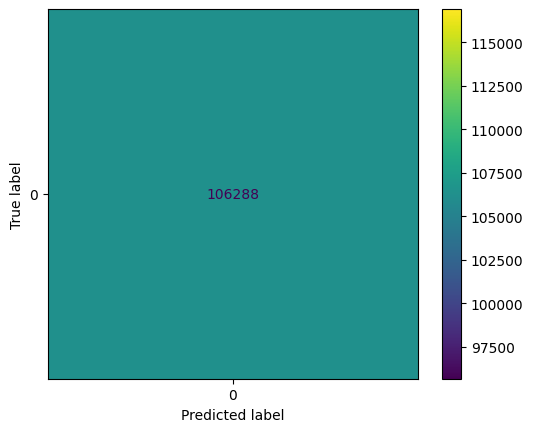

testing accuracy of file 0 = 1.0000
------------------------------ KNN for file 1 ------------------------------
num of malicious samples in training set: 0.0311
num of malicious samples in testing set: 0.0305


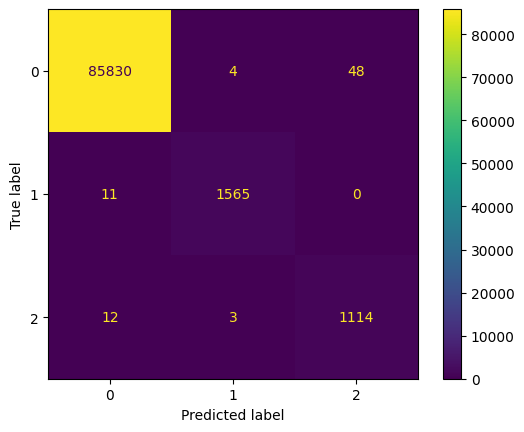

testing accuracy of file 1 = 0.9991
------------------------------ KNN for file 2 ------------------------------
num of malicious samples in training set: 0.3645
num of malicious samples in testing set: 0.3659


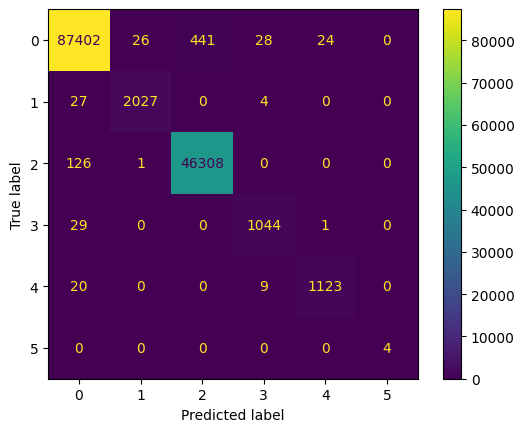

testing accuracy of file 2 = 0.9947
------------------------------ KNN for file 3 ------------------------------
num of malicious samples in training set: 0.0127
num of malicious samples in testing set: 0.0130


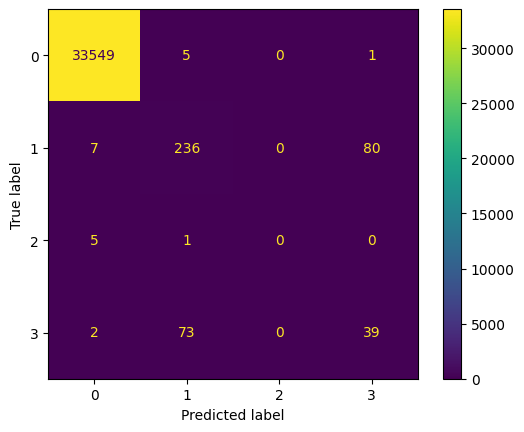

testing accuracy of file 3 = 0.9949
------------------------------ KNN for file 4 ------------------------------
num of malicious samples in training set: 0.0001
num of malicious samples in testing set: 0.0001


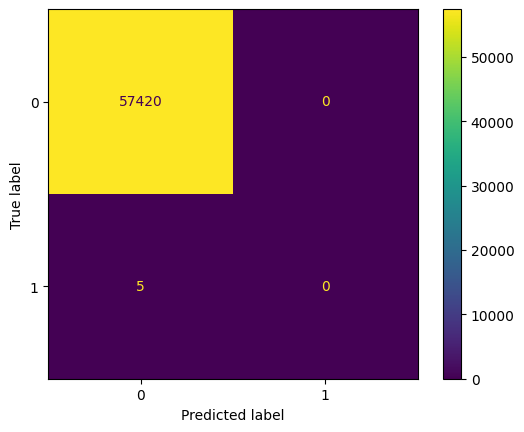

testing accuracy of file 4 = 0.9999
------------------------------ KNN for file 5 ------------------------------
num of malicious samples in training set: 0.0103
num of malicious samples in testing set: 0.0102


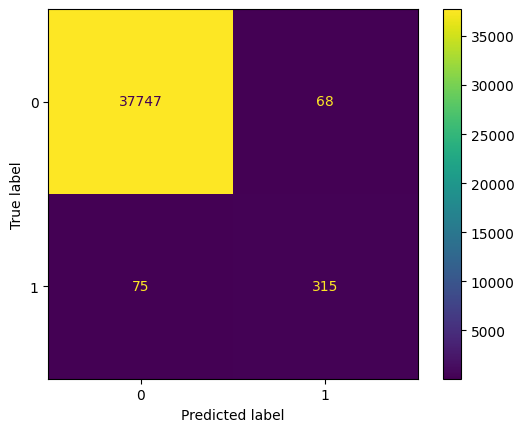

testing accuracy of file 5 = 0.9963
------------------------------ KNN for file 6 ------------------------------
num of malicious samples in training set: 0.5541
num of malicious samples in testing set: 0.5574


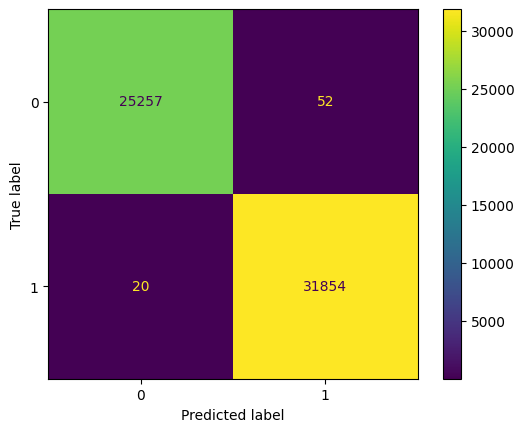

testing accuracy of file 6 = 0.9987
------------------------------ KNN for file 7 ------------------------------
num of malicious samples in training set: 0.5674
num of malicious samples in testing set: 0.5661


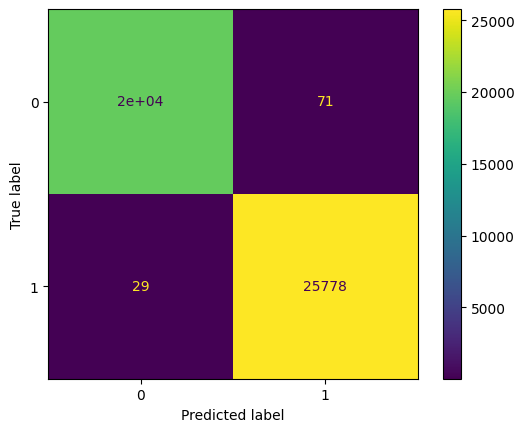

testing accuracy of file 7 = 0.9978


In [ ]:
# Homework: 
# train KNN model for the whole dataset?
# as KNN can not deal with large training set, train KNN for each file

from sklearn.neighbors import KNeighborsClassifier

for i in range(8):
  df = dfs[i]
  # train KNN for each file
  print('-'*30 +' KNN for file {}'.format(i), '-'*30)
  # split the df into training and testing sets
  # split the data into training and testing sets
  mask = np.random.rand(len(df)) < 0.8
  df_train = df[mask]
  df_test = df[~mask]

  X_train = df_train[df_train.columns[:-1]]
  y_train = df_train[df_train.columns[-1]]

  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  print('num of malicious samples in training set: {:.4f}'.format(sum(y_train != 'BENIGN')/len(y_train)))
  print('num of malicious samples in testing set: {:.4f}'.format(sum(y_test != 'BENIGN')/len(y_test)))

  # Homework: complete this